In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Twitter_Sentiments/

/content/drive/MyDrive/Twitter_Sentiments


In [3]:
import pandas as pd
df = pd.read_csv('socialmedia-disaster-tweets-DFE (2).csv', encoding='cp775')

In [4]:
for i in df:
  if(i != 'text'):
    df.drop(columns=i,inplace=True)

In [5]:
df

,text
0,Just happened a terrible car crash
1,Our Deeds are the Reason of this #earthquake M...
2,"Heard about #earthquake is different cities, s..."
3,"there is a forest fire at spot pond, geese are..."
4,Forest fire near La Ronge Sask. Canada
...,...
10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
10872,Police investigating after an e-bike collided ...
10873,The Latest: More Homes Razed by Northern Calif...
10874,MEG issues Hazardous Weather Outlook (HWO) htt...


In [6]:
df=df[1:10000]

In [7]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.8 MB/s eta 0:00:00


In [8]:
df1=df

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
#nltk.download('vader_lexicon')

sentiments = SentimentIntensityAnalyzer()

df1["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df1["text"]]
df1["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df1["text"]]
df1["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df1["text"]]
df1["Compound"] = [sentiments.polarity_scores(i)["compound"] for i in df1["text"]]

<ipython-input-9-2d770e4ab575>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df1["text"]]
<ipython-input-9-2d770e4ab575>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df1["text"]]
<ipython-input-9-2d770e4ab575>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [10]:
df1

,text,Positive,Negative,Neutral,Compound
1,Our Deeds are the Reason of this #earthquake M...,0.149,0.000,0.851,0.2732
2,"Heard about #earthquake is different cities, s...",0.266,0.000,0.734,0.4404
3,"there is a forest fire at spot pond, geese are...",0.000,0.228,0.772,-0.6159
4,Forest fire near La Ronge Sask. Canada,0.000,0.286,0.714,-0.3400
5,All residents asked to 'shelter in place' are ...,0.000,0.095,0.905,-0.2960
...,...,...,...,...,...
9995,I don't get waves of missing you anymore... Th...,0.147,0.116,0.737,0.1513
9996,I think Tsunami has hit the wall. Dang... #STL...,0.000,0.000,1.000,0.0000
9997,@TA7LPlays @Twitch_Bang @Maliceqt @Zelse007 @R...,0.000,0.085,0.915,-0.0772
9998,@Kamunt Holy crap it's been forever since I sa...,0.245,0.062,0.692,0.7418


In [11]:
df1['Sentiment'] = df1['Compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')

<ipython-input-11-acc9438dabcf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sentiment'] = df1['Compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')


In [12]:
df1.rename(columns={'text':'Text'},inplace=True)

<ipython-input-12-d769bdeea7c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'text':'Text'},inplace=True)


In [13]:
df1.drop(columns='Positive',inplace=True)

<ipython-input-13-824fa9aad5e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns='Positive',inplace=True)


In [14]:
df1.drop(columns='Negative',inplace=True)

<ipython-input-14-476c1e68f001>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns='Negative',inplace=True)


In [15]:
df1.drop(columns='Compound',inplace=True)

<ipython-input-15-6dcface79a1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns='Compound',inplace=True)


In [16]:
df1.drop(columns='Neutral',inplace=True)

<ipython-input-16-847a649a2063>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns='Neutral',inplace=True)


In [17]:
df2=df1[df1['Sentiment']!='neutral']

In [18]:
df2['Sentiment'].value_counts()

negative    5026
positive    2590
Name: Sentiment, dtype: int64

In [19]:
df2['Sentiment'].replace({'positive':1,'negative':0},inplace=True)

<ipython-input-19-7baa5b2452c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Sentiment'].replace({'positive':1,'negative':0},inplace=True)


In [20]:
df2

,Text,Sentiment
1,Our Deeds are the Reason of this #earthquake M...,1
2,"Heard about #earthquake is different cities, s...",1
3,"there is a forest fire at spot pond, geese are...",0
4,Forest fire near La Ronge Sask. Canada,0
5,All residents asked to 'shelter in place' are ...,0
...,...,...
9993,I liked a @YouTube video http://t.co/18aAsFMVb...,1
9994,Dr. Jim &amp; the tsunami: The latest New York...,0
9995,I don't get waves of missing you anymore... Th...,1
9997,@TA7LPlays @Twitch_Bang @Maliceqt @Zelse007 @R...,0


In [21]:
df2['Sentiment'].replace({'positive':1,'negative':0},inplace=True)

<ipython-input-21-7baa5b2452c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Sentiment'].replace({'positive':1,'negative':0},inplace=True)


In [22]:
df2

,Text,Sentiment
1,Our Deeds are the Reason of this #earthquake M...,1
2,"Heard about #earthquake is different cities, s...",1
3,"there is a forest fire at spot pond, geese are...",0
4,Forest fire near La Ronge Sask. Canada,0
5,All residents asked to 'shelter in place' are ...,0
...,...,...
9993,I liked a @YouTube video http://t.co/18aAsFMVb...,1
9994,Dr. Jim &amp; the tsunami: The latest New York...,0
9995,I don't get waves of missing you anymore... Th...,1
9997,@TA7LPlays @Twitch_Bang @Maliceqt @Zelse007 @R...,0


In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [26]:
df2

,Text,Sentiment
1,Our Deeds are the Reason of this #earthquake M...,1
2,"Heard about #earthquake is different cities, s...",1
3,"there is a forest fire at spot pond, geese are...",0
4,Forest fire near La Ronge Sask. Canada,0
5,All residents asked to 'shelter in place' are ...,0
...,...,...
9993,I liked a @YouTube video http://t.co/18aAsFMVb...,1
9994,Dr. Jim &amp; the tsunami: The latest New York...,0
9995,I don't get waves of missing you anymore... Th...,1
9997,@TA7LPlays @Twitch_Bang @Maliceqt @Zelse007 @R...,0


In [27]:
#Removal of Punctuation Marks
from nltk import SnowballStemmer
import re

stemmer = SnowballStemmer("english")
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words("english")
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

# Removal of Special Characters
def remove_characters(text):
    return re.sub("[^a-zA-Z]"," ",text)

#Removal of stopwords
def remove_stopwords_and_lemmatization(text):
    final_text = []
    text = text.lower()
    text = nltk.word_tokenize(text)

    for word in text:
        if word not in set(stopwords.words('english')):
            lemma = nltk.WordNetLemmatizer()
            word = lemma.lemmatize(word)
            final_text.append(word)
    return " ".join(final_text)


def stemming(text):
    stemmed_text = ""
    for word in text.split():
        stem = stemmer.stem(word)
        stemmed_text += stem
        stemmed_text += " "

    stemmed_text = stemmed_text.strip()
    return stemmed_text
#Total function
def cleaning(text):

    text = remove_punctuations(text)
    text = remove_characters(text)
    text = stemming(text)
    text = remove_stopwords_and_lemmatization(text)

    return text

#Apply function on text column
df2['Text']=df2['Text'].apply(cleaning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-27-a19b2f6043c4>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Text']=df2['Text'].apply(cleaning)


In [28]:
df2

,Text,Sentiment
1,deed reason earthquak may allah forgiv u,1
2,heard earthquak differ citi stay safe everyon,1
3,forest fire spot pond gee flee across street save,0
4,forest fire near la rong sask canada,0
5,resid ask shelter place notifi offic evacu she...,0
...,...,...
9993,like youtub video http co aasfmvbl call duti g...,1
9994,dr jim amp tsunami latest new yorker warn u un...,0
9995,get wave miss anymor like tsunami tide eye,1
9997,ta lplay twitch bang maliceqt zels rhyareegam ...,0


In [43]:
X=df2['Text']
y=df2['Sentiment']

In [44]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
X = df2["Text"]
y = df2["Sentiment"]
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_scaled = cv.fit_transform(X)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=42)


# **SVM**

In [45]:
#SVM

from sklearn import svm
svm_class= svm.SVC()
svm_class.fit(X_train,y_train)


SVC()

In [46]:

y_pred2=svm_class.predict(X_test)
Accuracy_Svm=round((metrics.accuracy_score(y_test, y_pred2)*100),2)
print('Accuracy: ',Accuracy_Svm,"%")



import numpy as np
from sklearn.metrics import classification_report
unique_classes = np.unique(np.concatenate((y_test, y_pred2)))

print(classification_report(y_test, y_pred2, target_names=[f'class {i}' for i in unique_classes]))


Accuracy:  83.07 %
              precision    recall  f1-score   support

     class 0       0.82      0.95      0.88       986
     class 1       0.87      0.62      0.72       538

    accuracy                           0.83      1524
   macro avg       0.84      0.78      0.80      1524
weighted avg       0.84      0.83      0.82      1524



# **DECISION TREE**

In [47]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
Decision_tree= DecisionTreeClassifier(criterion='entropy', random_state=0)
Decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [48]:

y_pred3=Decision_tree.predict(X_test)
Accuracy_Decision_tree=round((metrics.accuracy_score(y_test, y_pred3)*100),2)
print('Accuracy: ',Accuracy_Decision_tree,"%")


import numpy as np
from sklearn.metrics import classification_report
unique_classes = np.unique(np.concatenate((y_test, y_pred3)))

print(classification_report(y_test, y_pred3, target_names=[f'class {i}' for i in unique_classes]))

Accuracy:  78.41 %
              precision    recall  f1-score   support

     class 0       0.83      0.83      0.83       986
     class 1       0.69      0.70      0.70       538

    accuracy                           0.78      1524
   macro avg       0.76      0.76      0.76      1524
weighted avg       0.78      0.78      0.78      1524



# **RANDOM FOREST**

In [49]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
Random_forest= RandomForestClassifier(n_estimators= 10, criterion="entropy")
Random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [50]:

y_pred4=Random_forest.predict(X_test)
Accuracy_Random_forest=round((metrics.accuracy_score(y_test, y_pred4)*100),2)
print('Accuracy: ',Accuracy_Random_forest,"%")


import numpy as np
from sklearn.metrics import classification_report
unique_classes = np.unique(np.concatenate((y_test, y_pred4)))

print(classification_report(y_test, y_pred4, target_names=[f'class {i}' for i in unique_classes]))

Accuracy:  79.4 %
              precision    recall  f1-score   support

     class 0       0.79      0.94      0.85       986
     class 1       0.82      0.53      0.65       538

    accuracy                           0.79      1524
   macro avg       0.80      0.73      0.75      1524
weighted avg       0.80      0.79      0.78      1524



# **LOGISTIC REGRESSION**

In [51]:
#Logistic Regresion


from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [52]:

y_pred5=logreg.predict(X_test)
Accuracy_logreg=round((metrics.accuracy_score(y_test, y_pred5)*100),2)
print('Accuracy: ',Accuracy_logreg,"%")


import numpy as np
from sklearn.metrics import classification_report
unique_classes = np.unique(np.concatenate((y_test, y_pred5)))

print(classification_report(y_test, y_pred5, target_names=[f'class {i}' for i in unique_classes]))

Accuracy:  85.04 %
              precision    recall  f1-score   support

     class 0       0.86      0.92      0.89       986
     class 1       0.83      0.72      0.77       538

    accuracy                           0.85      1524
   macro avg       0.84      0.82      0.83      1524
weighted avg       0.85      0.85      0.85      1524



# **ANN**

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
from nltk.tokenize import word_tokenize
from nltk import FreqDist

all_words=' '.join(X_train)
all_words=word_tokenize(all_words)
dist=FreqDist(all_words)
num_unique_word=len(dist)
num_unique_word # initial value to use for hyperparameterization

15864

In [56]:
MAX_REVIEW_LEN=0
for text in X_train:
    word=word_tokenize(text)
    l=len(word)
    MAX_REVIEW_LEN = max(MAX_REVIEW_LEN, l)

MAX_REVIEW_LEN

27

In [57]:
max_features = num_unique_word # find total number of unique words using word_tokenize
max_words = MAX_REVIEW_LEN  # find maximum length of words using word_tokenize
batch_size = 64
epochs = 10
num_classes=2

In [58]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_test)
#X_test = tokenizer.texts_to_sequences(test_text)

In [59]:
import tensorflow as tf
X_train =  tf.keras.utils.pad_sequences(X_train, maxlen=max_words)
X_val =  tf.keras.utils.pad_sequences(X_val, maxlen=max_words)
#X_test =  tf.keras.utils.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_val.shape)

(6092, 27) (1524, 27)


In [60]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=(27)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train,epochs=100, verbose=1)
scores = model.evaluate(X_val, y_test, verbose=1)
print("Accuracy:", scores[1])

Epoch 1/100
191/191 [==============================] - 4s 5ms/step - loss: 68.8275 - accuracy: 0.5666
Epoch 2/100
191/191 [==============================] - 1s 5ms/step - loss: 30.8427 - accuracy: 0.5804
Epoch 3/100
191/191 [==============================] - 1s 5ms/step - loss: 20.3145 - accuracy: 0.5888
Epoch 4/100
191/191 [==============================] - 1s 3ms/step - loss: 15.1549 - accuracy: 0.6124
Epoch 5/100
191/191 [==============================] - 1s 3ms/step - loss: 13.5367 - accuracy: 0.6016
Epoch 6/100
191/191 [==============================] - 1s 3ms/step - loss: 10.3802 - accuracy: 0.6152
Epoch 7/100
191/191 [==============================] - 1s 3ms/step - loss: 9.1347 - accuracy: 0.6162
Epoch 8/100
191/191 [==============================] - 1s 3ms/step - loss: 8.7903 - accuracy: 0.6092
Epoch 9/100
191/191 [==============================] - 1s 3ms/step - loss: 7.0501 - accuracy: 0.6302
Epoch 10/100
191/191 [==============================] - 1s 3ms/step - loss: 6.1606 - 

In [61]:
model_json=model.to_json()
with open("model.json","w") as json_file:
     json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [62]:
import tensorflow
from tensorflow.keras.models import model_from_json
json_file1=open('model.json','r')
loaded_model_json=json_file1.read()
json_file1.close()
loaded_model=model_from_json(loaded_model_json)

loaded_model.load_weights("model.h5")

print("Loaded model from disk")
loaded_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
score=loaded_model.evaluate(X_val,y_test,verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1],score[1]*100))

Loaded model from disk
accuracy: 63.19%


# **DATA VISUALIZATION**

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

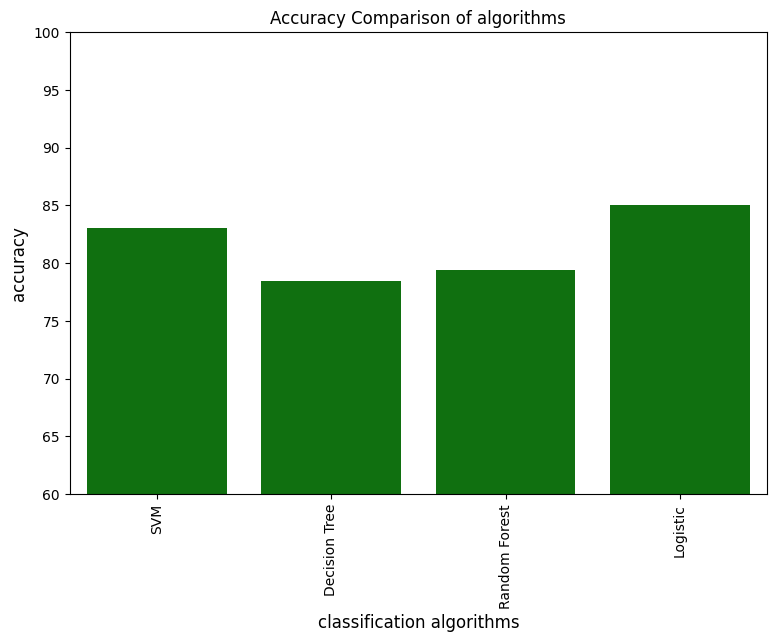

In [66]:
plt.figure(figsize=(9,6))
acc=[Accuracy_Svm,Accuracy_Decision_tree,Accuracy_Random_forest,Accuracy_logreg]
alg=['SVM','Decision Tree','Random Forest','Logistic']
plt.ylim(60,100)

sns.barplot(x=alg, y=acc,color='green')
plt.xticks(rotation='vertical')

plt.xlabel('classification algorithms', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.title("Accuracy Comparison of algorithms")
plt.show()

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

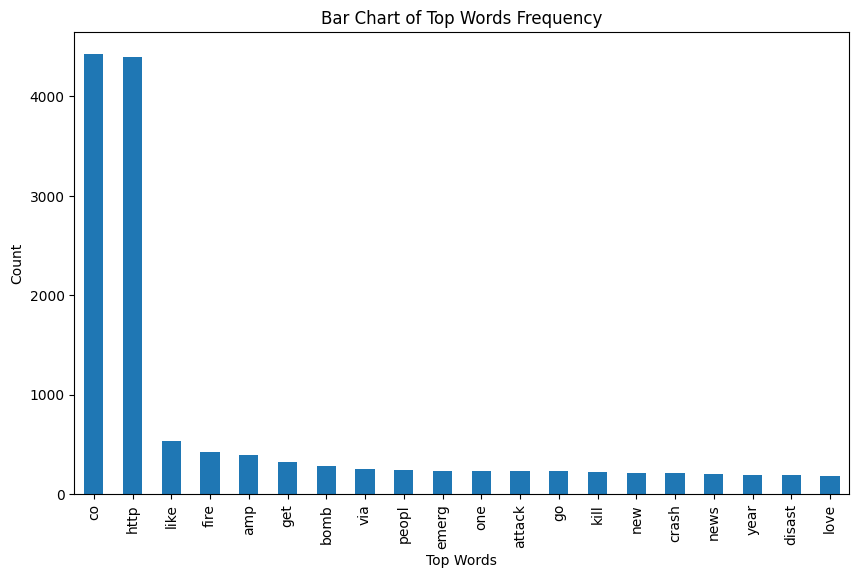

In [67]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
  vec = CountVectorizer().fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx])
        for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key=lambda x: x[1],
            reverse=True)
  return words_freq[:n]


common_words = get_top_n_words(df2['Text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(kind='bar',figsize=(10, 6), xlabel="Top Words", ylabel="Count", title="Bar Chart of Top Words Frequency")

<function matplotlib.pyplot.show(close=None, block=None)>

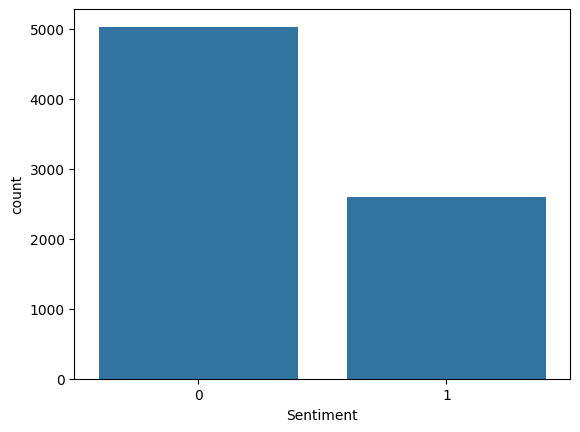

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df2,x="Sentiment",order=df2["Sentiment"].value_counts().index)
plt.show

# **EDA**

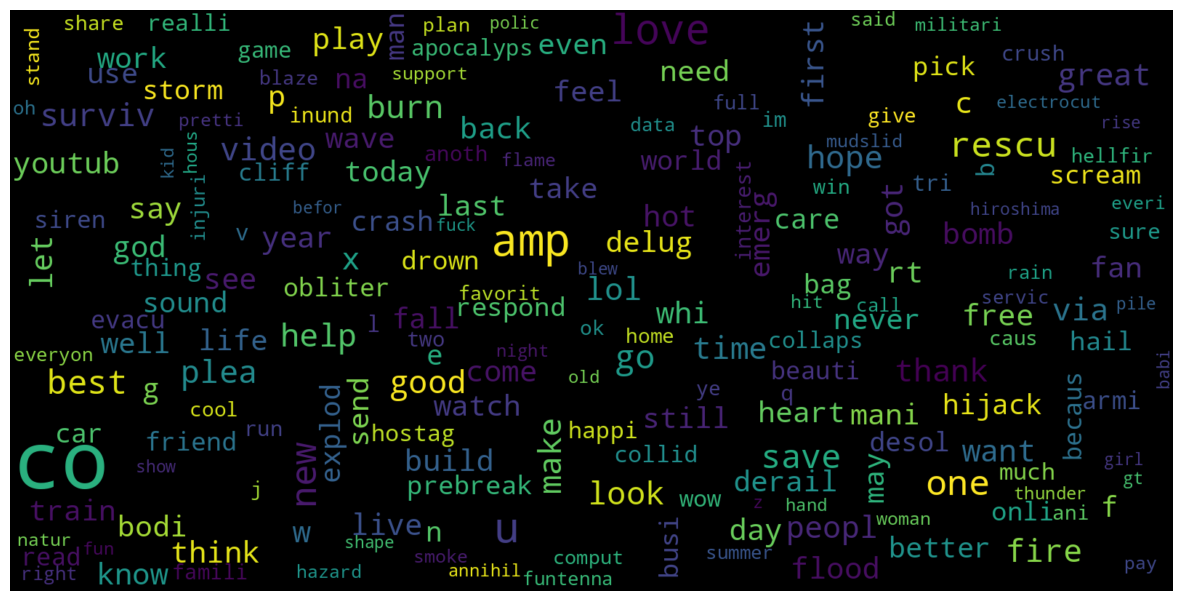

In [69]:
# disaster tweets
from wordcloud import WordCloud

consolidated = ' '.join(word for word in df2['Text'][df2['Sentiment'] == 1].astype(str))
wordCloud = WordCloud(width=1600,height=800,random_state=21,max_font_size=110,collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

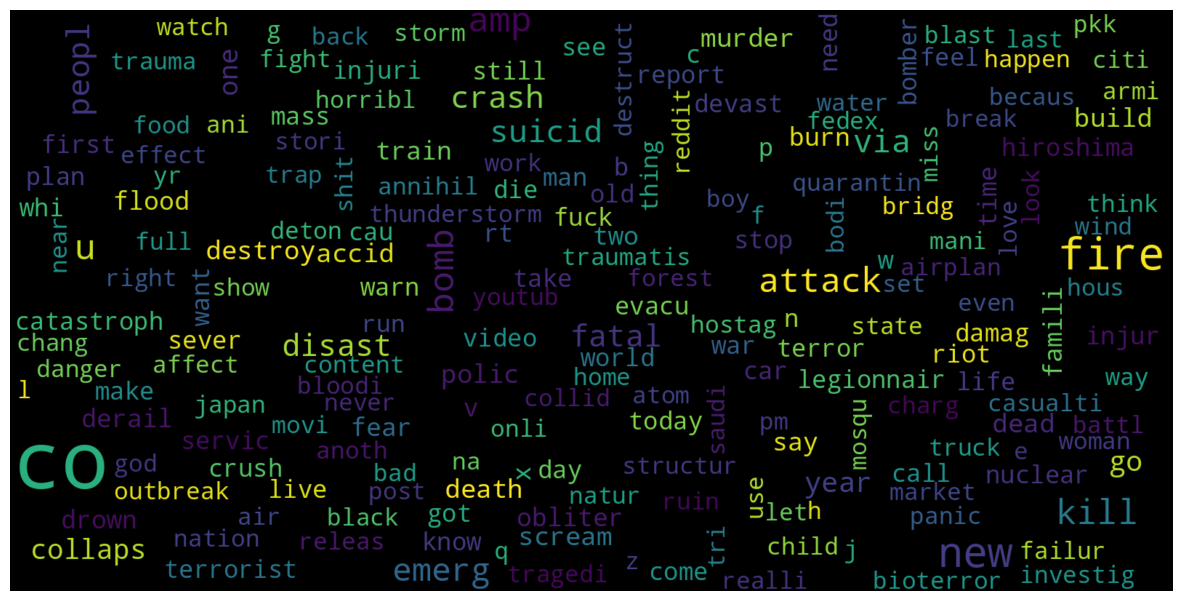

In [70]:
# not disaster tweets
from wordcloud import WordCloud

consolidated = ' '.join(word for word in df2['Text'][df2['Sentiment'] == 0].astype(str))
wordCloud = WordCloud(width=1600,height=800,random_state=21,max_font_size=110,collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

**PREDICTION OF NEW Review using logistic regression model**

In [71]:
#new_review = [["Forest near La Ronge Sask. Canada"]]
new_review = [["Heard about #earthquake is different cities, stay safe everyone."]]
new_review_df= pd.DataFrame(new_review, columns = ['new_review'])
new_review_df

,new_review
0,"Heard about #earthquake is different cities, s..."


In [72]:
new_review_df['new_review']=new_review_df['new_review'].apply(cleaning)
new_review_df

,new_review
0,heard earthquak differ citi stay safe everyon


In [73]:
newText = df2['Text']
new_merged_series = newText.append(new_review_df['new_review'])
new_merged_series

<ipython-input-73-d6bbfec6f310>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_merged_series = newText.append(new_review_df['new_review'])


1                deed reason earthquak may allah forgiv u
2           heard earthquak differ citi stay safe everyon
3       forest fire spot pond gee flee across street save
4                    forest fire near la rong sask canada
5       resid ask shelter place notifi offic evacu she...
                              ...                        
9994    dr jim amp tsunami latest new yorker warn u un...
9995           get wave miss anymor like tsunami tide eye
9997    ta lplay twitch bang maliceqt zels rhyareegam ...
9998    kamunt holi crap forev sinc saw movi nostalgia...
0           heard earthquak differ citi stay safe everyon
Length: 7617, dtype: object

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
new_scaled = cv.fit_transform(new_merged_series)

#prediction
new_prediction = logreg.predict(new_scaled[-1])
print(new_prediction)
if new_prediction[0]==1:
  print("It is a disaster tweet")
else:
  print("It is not a disaster tweet")


[1]
It is a disaster tweet
